## PROBLEM 5
HIV MODEL

已下载.csv文件至本文件夹中直接读取数据即可.

In [11]:
import pandas as pd

# Specify the path to your CSV file
file_path = 'D:\Com.Physics Homework Week 12nd\HIVseries.csv'

# Load the CSV file into a pandas DataFrame
data = pd.read_csv(file_path)

<>:4: SyntaxWarning: invalid escape sequence '\C'
<>:4: SyntaxWarning: invalid escape sequence '\C'
C:\Users\dell\AppData\Local\Temp\ipykernel_35356\3121498468.py:4: SyntaxWarning: invalid escape sequence '\C'
  file_path = 'D:\Com.Physics Homework Week 12nd\HIVseries.csv'


<>:7: SyntaxWarning: invalid escape sequence '\C'
<>:7: SyntaxWarning: invalid escape sequence '\C'
C:\Users\dell\AppData\Local\Temp\ipykernel_35356\3464234135.py:7: SyntaxWarning: invalid escape sequence '\C'
  file_path = 'D:\Com.Physics Homework Week 12nd\HIVseries.csv'


Optimal parameters:
A = 69769.04982644042 (95% CI: [-1782278950271.2944, 1782279089809.394])
alpha = 0.35104579617366927 (95% CI: [-5402.002125989632, 5402.70421758198])
B = 69775.87380356641 (95% CI: [-1782278945139.5542, 1782279084691.3018])
beta = 0.3510041288100888 (95% CI: [-5474.696502030941, 5475.398510288561])


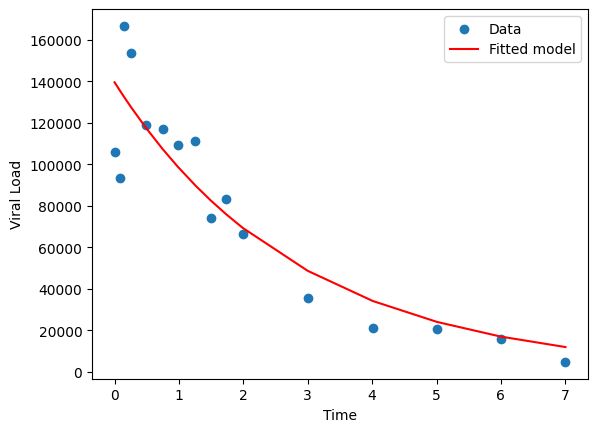

In [16]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'D:\Com.Physics Homework Week 12nd\HIVseries.csv'
data = pd.read_csv(file_path)

# Assuming the dataset has columns 'Time' and 'Viral Load' (replace with actual column names)
time = data['Time']
viral_load = data['Viral Load']

# Define the model function
def viral_load_model(t, A, alpha, B, beta):
    return A * np.exp(-alpha * t) + B * np.exp(-beta * t)

# Provide initial guesses for the parameters
initial_guesses = [1, 0.1, 1, 0.1]

# Fit the model to the data with increased maxfev
popt, pcov = curve_fit(viral_load_model, time, viral_load, p0=initial_guesses, maxfev=5000)

# Extract the optimal parameters and their covariance matrix
A, alpha, B, beta = popt
perr = np.sqrt(np.diag(pcov))

# Calculate the 95% confidence intervals for each parameter
from scipy.stats import t

# Degrees of freedom
dof = max(0, len(time) - len(popt))

# Student's t-value for 95% confidence interval
t_value = t.ppf(0.975, dof)

# Confidence intervals
ci_A = [A - t_value * perr[0], A + t_value * perr[0]]
ci_alpha = [alpha - t_value * perr[1], alpha + t_value * perr[1]]
ci_B = [B - t_value * perr[2], B + t_value * perr[2]]
ci_beta = [beta - t_value * perr[3], beta + t_value * perr[3]]

print(f"Optimal parameters:")
print(f"A = {A} (95% CI: {ci_A})")
print(f"alpha = {alpha} (95% CI: {ci_alpha})")
print(f"B = {B} (95% CI: {ci_B})")
print(f"beta = {beta} (95% CI: {ci_beta})")

# Plot the data and the fitted model
plt.scatter(time, viral_load, label='Data')
plt.plot(time, viral_load_model(time, *popt), label='Fitted model', color='red')
plt.xlabel('Time')
plt.ylabel('Viral Load')
plt.legend()
plt.show()


## PROBELM 6
Germ Model

<>:7: SyntaxWarning: invalid escape sequence '\C'
<>:7: SyntaxWarning: invalid escape sequence '\C'
C:\Users\dell\AppData\Local\Temp\ipykernel_35356\1285677897.py:7: SyntaxWarning: invalid escape sequence '\C'
  file_path = 'D:\Com.Physics Homework Week 12nd\data germ.xlsx'  # Replace with your actual file path


     Time   Value
0  0.1699  0.0190
1  0.4426  0.0855
2  0.5111  0.1164
3  0.7156  0.1639
4  1.0564  0.2470
Optimal parameter:
tau = 3.4275852815300536 (95% CI: [3.280664854791277, 3.57450570826883])


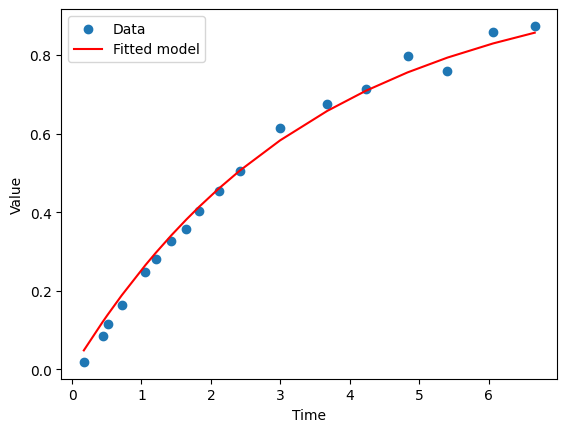

In [17]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'D:\Com.Physics Homework Week 12nd\data germ.xlsx'  # Replace with your actual file path
data = pd.read_excel(file_path)

# Display the first few rows to understand the structure of the data
print(data.head())

# Assuming the dataset has columns 'Time' and 'Value' (replace with actual column names)
time = data['Time']
value = data['Value']

# Define the model function
def bacterial_growth_model(t, tau):
    return 1 - np.exp(-t / tau)

# Provide initial guess for the parameter tau
initial_guess = [1]

# Fit the model to the data
popt, pcov = curve_fit(bacterial_growth_model, time, value, p0=initial_guess, maxfev=5000)

# Extract the optimal parameter and its covariance
tau = popt[0]
tau_err = np.sqrt(np.diag(pcov))[0]

# Calculate the 95% confidence interval for tau
from scipy.stats import t

# Degrees of freedom
dof = max(0, len(time) - len(popt))

# Student's t-value for 95% confidence interval
t_value = t.ppf(0.975, dof)

# Confidence interval
ci_tau = [tau - t_value * tau_err, tau + t_value * tau_err]

print(f"Optimal parameter:")
print(f"tau = {tau} (95% CI: {ci_tau})")

# Plot the data and the fitted model
plt.scatter(time, value, label='Data')
plt.plot(time, bacterial_growth_model(time, *popt), label='Fitted model', color='red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


## PROBLEM 7
Germ Model About B Version


     Time   Value
0  0.1699  0.0190
1  0.4426  0.0855
2  0.5111  0.1164
3  0.7156  0.1639
4  1.0564  0.2470
Optimal parameters:
A = 4.372528651163485e-09 (95% CI: [-0.03148255620697722, 0.031482564952034525])
tau = 2.7543772907986902e-08 (95% CI: [-0.19831736608523148, 0.1983174211727773])


<>:7: SyntaxWarning: invalid escape sequence '\C'
<>:7: SyntaxWarning: invalid escape sequence '\C'
C:\Users\dell\AppData\Local\Temp\ipykernel_35356\183082725.py:7: SyntaxWarning: invalid escape sequence '\C'
  file_path = 'D:\Com.Physics Homework Week 12nd\data germ B.xlsx'  # Replace with your actual file path
d:\Python\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


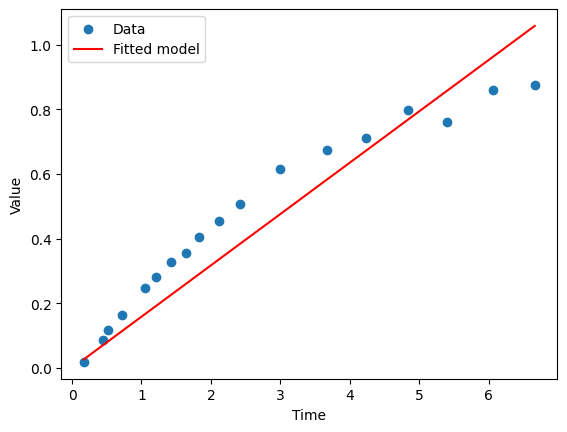

In [18]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'D:\Com.Physics Homework Week 12nd\data germ B.xlsx'  # Replace with your actual file path
data = pd.read_excel(file_path)

# Display the first few rows to understand the structure of the data
print(data.head())

# Assuming the dataset has columns 'Time' and 'Value' (replace with actual column names)
time = data['Time']
value = data['Value']

# Define the model function
def bacterial_model(t, A, tau):
    return A * (np.exp(-t / tau) - 1 + t / tau)

# Provide initial guesses for the parameters A and tau
initial_guesses = [1, 1]

# Fit the model to the data with increased maxfev
popt, pcov = curve_fit(bacterial_model, time, value, p0=initial_guesses, maxfev=5000)

# Extract the optimal parameters and their covariance matrix
A, tau = popt
perr = np.sqrt(np.diag(pcov))

# Calculate the 95% confidence intervals for each parameter
from scipy.stats import t

# Degrees of freedom
dof = max(0, len(time) - len(popt))

# Student's t-value for 95% confidence interval
t_value = t.ppf(0.975, dof)

# Confidence intervals
ci_A = [A - t_value * perr[0], A + t_value * perr[0]]
ci_tau = [tau - t_value * perr[1], tau + t_value * perr[1]]

print(f"Optimal parameters:")
print(f"A = {A} (95% CI: {ci_A})")
print(f"tau = {tau} (95% CI: {ci_tau})")

# Plot the data and the fitted model
plt.scatter(time, value, label='Data')
plt.plot(time, bacterial_model(time, *popt), label='Fitted model', color='red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()
